In [158]:
import numpy as np
import matplotlib.pyplot as plt
from spacepy import pycdf
import datetime as dt
import glob

In [159]:
DATA_PATH = '../data/BLK/*.cdf'
INVALID = -1e31

In [160]:
all_time = []
all_density = []
all_bulk_speed = []
all_thermal_speed = []

In [161]:
for file in sorted(glob.glob(DATA_PATH)):
    print(f"Reading: {file}")
    with CDF(file) as cdf:
        try:
            time = np.array([dt.datetime.fromtimestamp(e.timestamp(), dt.UTC) for e in cdf['epoch_for_cdf_mod'][:]])
            density = np.array(cdf['proton_density'][:])
            bulk_speed = np.array(cdf['proton_bulk_speed'][:])
            thermal_speed = np.array(cdf['proton_thermal'][:])
        except KeyError as e:
            print(f"Missing expected variable in {file}: {e}")
            continue

        # Filter invalid values
        valid_mask = (
            (density != INVALID) &
            (bulk_speed != INVALID) &
            (thermal_speed != INVALID)
        )

        # Apply mask and extend global lists
        all_time.extend(time[valid_mask])
        all_density.extend(density[valid_mask])
        all_bulk_speed.extend(bulk_speed[valid_mask])
        all_thermal_speed.extend(thermal_speed[valid_mask])

Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250531_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250601_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250602_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250603_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250604_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250605_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250606_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250607_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250608_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250609_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250610_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250611_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250612_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/AL1_ASW91_L2_BLK_20250613_UNP_9999_999999_V02.cdf
Reading: ./data/BLK/

In [162]:
all_time = np.array(all_time)
all_density = np.array(all_density)
all_bulk_speed = np.array(all_bulk_speed)
all_thermal_speed = np.array(all_thermal_speed)

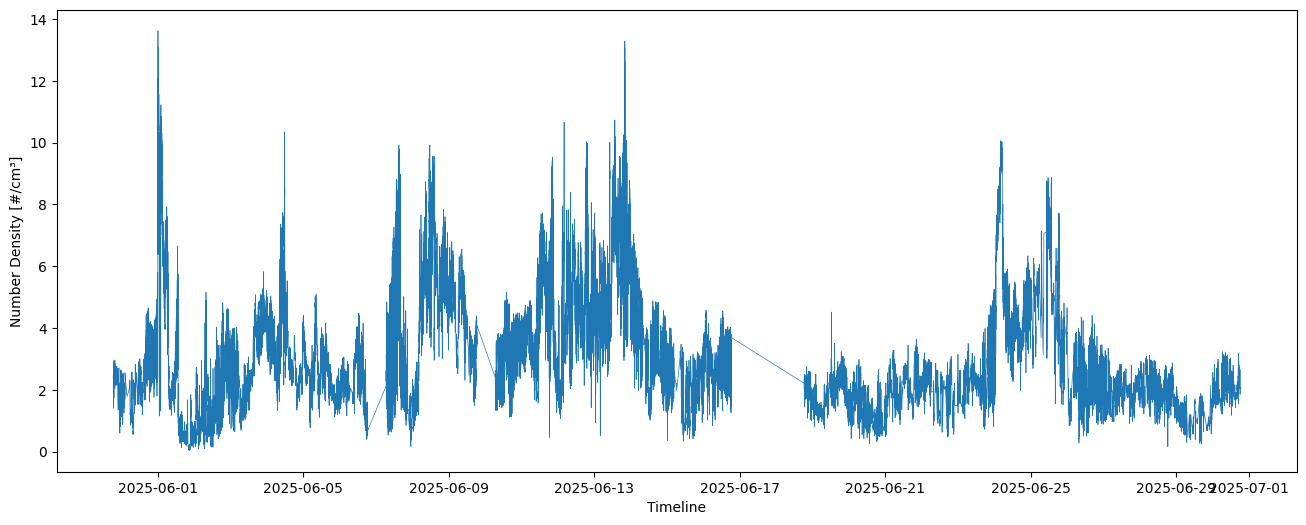

In [163]:
fig, ax = plt.subplots(figsize=(16, 6)) 
ax.plot(all_time, all_density, linewidth=0.5)
ax.set_xlabel("Timeline")
ax.set_ylabel("Number Density [#/cm³]")
plt.show()

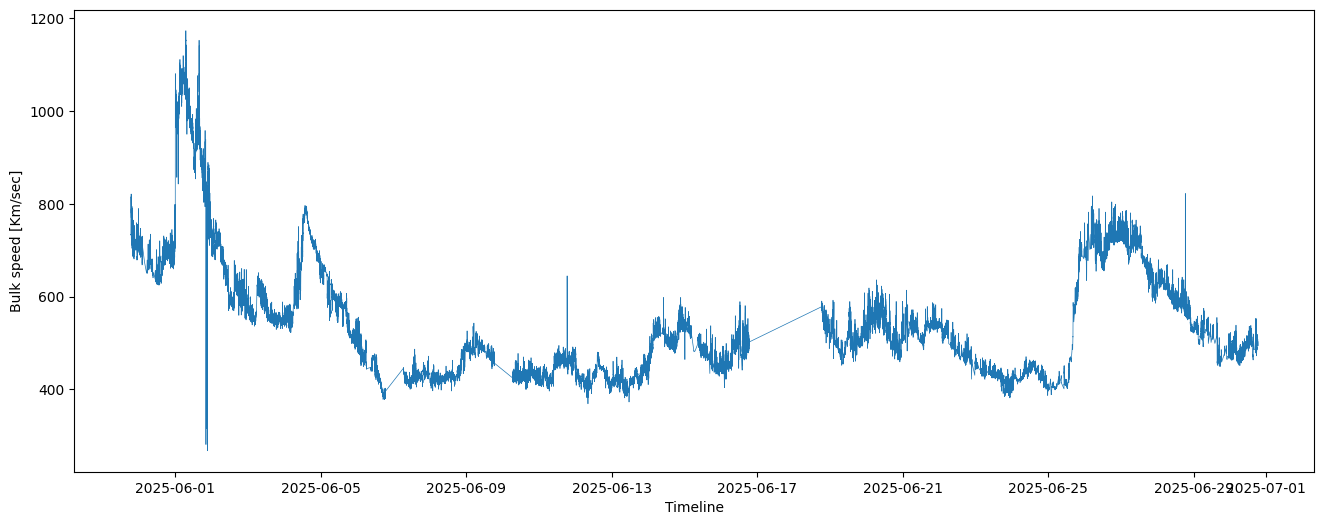

In [164]:
fig, ax = plt.subplots(figsize=(16, 6)) 
ax.plot(all_time, all_bulk_speed, linewidth=0.5)
ax.set_xlabel("Timeline")
ax.set_ylabel("Bulk speed [Km/sec]")
plt.show()

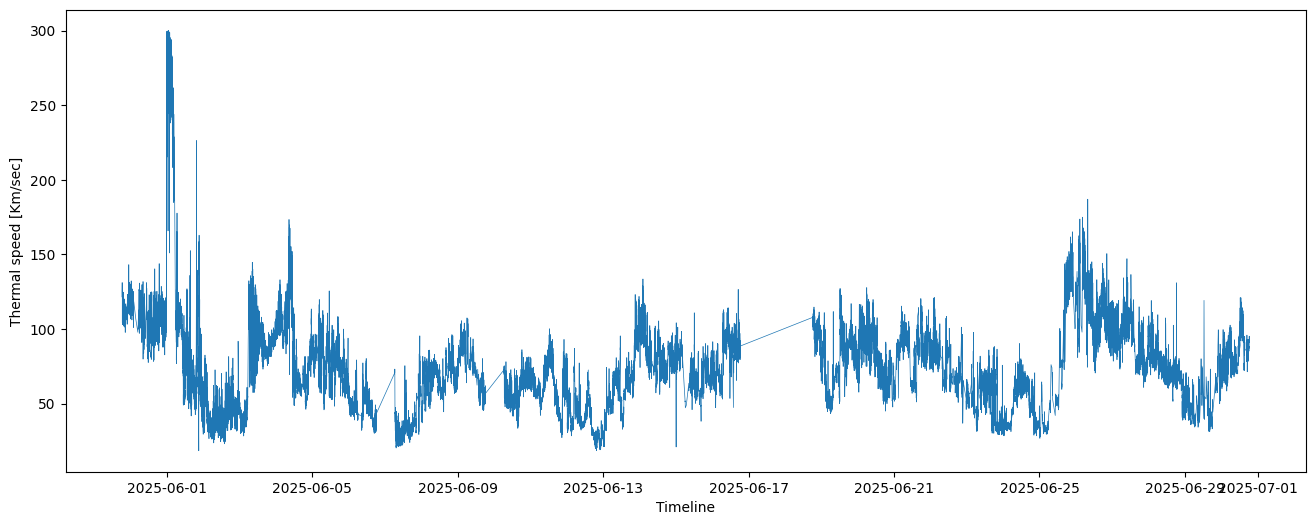

In [165]:
fig, ax = plt.subplots(figsize=(16, 6)) 
ax.plot(all_time, all_thermal_speed, linewidth=0.5)
ax.set_xlabel("Timeline")
ax.set_ylabel("Thermal speed [Km/sec]")
plt.show()